# Ejercicio 3


## INTRODUCCION
En este ejercicio se estudia si la distribucion morfologica de los datos descargados es o no uniforme. Para ello se utiliza el test chi cuadrado con un grado de libertad, ya que tenemos solo dos parametros y el numero de grados de libertad es $k=n-1$ donde $k$ es el grado de libertad $n$ es el numero de parametros. Se escoje un $\alpha = 0.05$ . Recordar que este test implica las distribuciones con frecuencia absoluta no relativa.

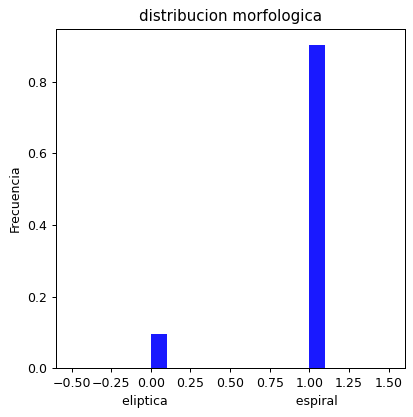

prueba de hipotesis:
 
Hay informacion suficiente para rechazar la hipotesis nula. p = 0.0 < 0.05
 


(-0.01, 1.0)

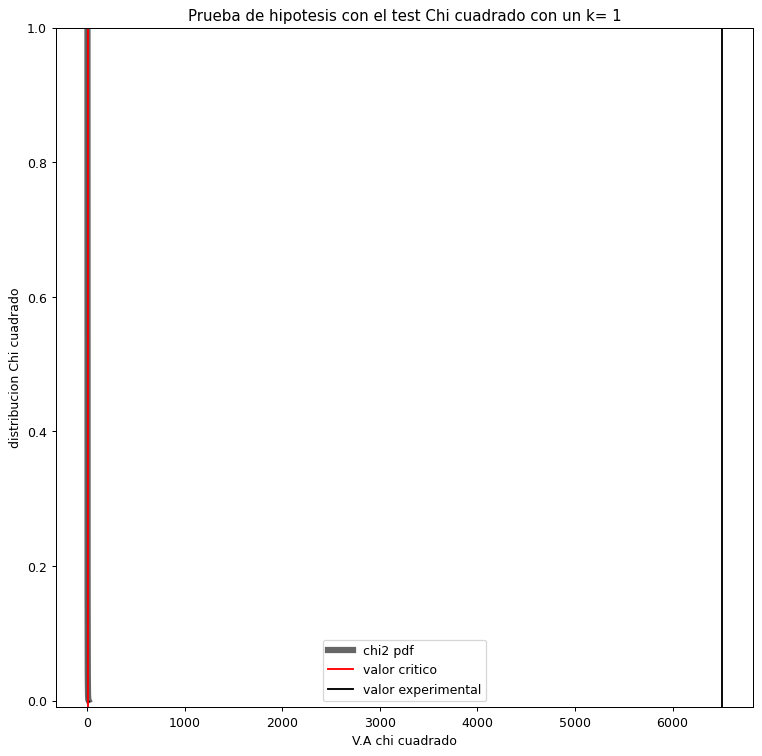

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import scipy.stats as st

df = pd.read_csv('GUIA3_patricioc.csv')

alpha=0.05

A=df.sort_values(by=['spiral']) 
B=df.loc[df[ 'spiral' ] == 1]
C=df.loc[df[ 'elliptical' ] == 1]

eli=B['elliptical']
esp=B['spiral']
eli2=C['elliptical']
esp2=C['spiral']



plt.figure(figsize=(5, 5), dpi=90) #dpi es la resolucion
plt.hist(esp2,weights=np.ones_like(esp2)/len(A), alpha=0.9, label='distribucion morfologica - elipticas', histtype='bar' , color='blue');

plt.hist(esp,weights=np.ones_like(esp)/len(A), alpha=0.9, label='distribucion morfologica - elipticas', histtype='bar' , color='blue');
plt.xlabel('eliptica                                espiral')
plt.ylabel('Frecuencia')
plt.title('distribucion morfologica')
plt.show()
#DISTRIBBUCION DE f
f=[len(esp),len(esp2)]

chi,p=scipy.stats.chisquare(f, f_exp=[0.5*(len(esp)+len(esp2)),0.5*(len(esp)+len(esp2))], ddof=0, axis=0);

print('prueba de hipotesis:')

if (p < alpha):
    print(' ')
    print('Hay informacion suficiente para rechazar la hipotesis nula. p =',p,'<',alpha);
    print(' ')

else:

    print(' ')
    print('no hay informacion suficiente para rechazar la hipotesis nula. p =',p,'= o >',alpha);
    print(' ')
    
#defino las variables de chi cuadrado
gl=gradoslibertad = 1
x = np.linspace(st.chi2.ppf(0.001, gl),st.chi2.ppf(0.999, gl), 1000)

#arreglo de las figuras
plt.figure(figsize=(10, 10), dpi=90); #dpi es la resolucion
plt.plot([min(x),max(x)],[0,0], c='k', lw=1)
plt.plot([0,0],[min(st.chi2.pdf(x, gl)),max(st.chi2.pdf(x, gl))], c='k', lw=1)

#plot de la distribucion de la probabilidad
plt.plot(x, st.chi2.pdf(x, gl),c='black', lw=5, alpha=0.6, label='chi2 pdf')

#VARIABLE ALEATORIA DE CHI CUADRADO
xla=st.chi2(gl)


#rectas. El cuantil 1-alpha es el valor critico
plt.axvline(x=xla.ppf(1-alpha), c='red',label='valor critico')
plt.axvline(x=chi, c='black',label='valor experimental')

#areas
if (chi<xla.ppf(1-alpha)):
    plt.fill_between(
        x, xla.pdf(x),
        where=np.logical_and(x < xla.ppf(1-alpha) , x > 0),
        color='green',
        alpha=0.7,
        linewidth=0)
plt.fill_between(
        x, xla.pdf(x),
        where=(x > xla.ppf(1-alpha)),
        color='red',
        alpha=0.7,
        linewidth=0)

plt.legend();
plt.xlabel('V.A chi cuadrado')
plt.ylabel('distribucion Chi cuadrado')
plt.title('Prueba de hipotesis con el test Chi cuadrado con un k= ' + str(gl) )
plt.ylim(-0.01,1)


# CONCLUSION

En este problema podemos asegurar que las distribuciones del archivo bajado son distintas a la distribucion uniforma planteada, existe suficiente informacion estadistica para asegurarlo segun la prueba realizada. Esto puede deberse a que el unico criterio usado para bajar las tablas fue que el redshift sea menor a 0.1, lo que nos lleva a pensar que en distancias cercanas haya mas galaxias espirales que elipticas. Otra posibilidad sugiere que el algoritmo que utiliza el query de la pagina para bajar del catalogo no sea aleatorio y haya tomado una muestra viciada. Para descartar dicha posibilidad se propone bajar un catalogo mas grande o disminuir a un mas la condicion sobre redshif y obtener toda las galaxias disponibles. 